# 🚚 **Entregables**

**No olvide duplicar esta notebook para poder editar: File->Save a copy in Drive**

En este laboratorio, no es necesario redactar un informe en un documento separado. Por favor, complete todas las actividades requeridas dentro de esta notebook de Google Colab. Recuerde que una notebook le permite ingresar elementos de texto de manera similar a un procesador de documentos. Una vez finalizadas las actividades propuestas, deberá entregar lo siguiente en la plataforma:

1. Un archivo PDF generado en Google Colab desde el menú "Archivo" -> "Imprimir".

2. El enlace público de Google Colab. Para ello, vaya al botón de compartir y cambie la configuración de compartición a "Cualquier persona con el enlace".

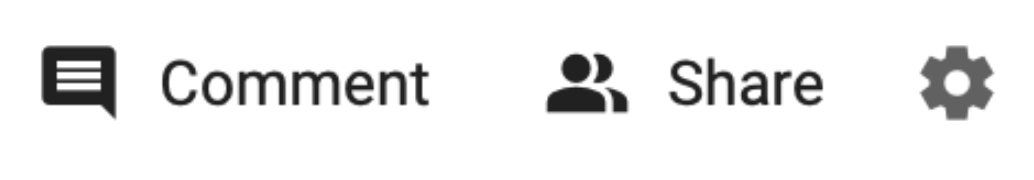

# Dataset

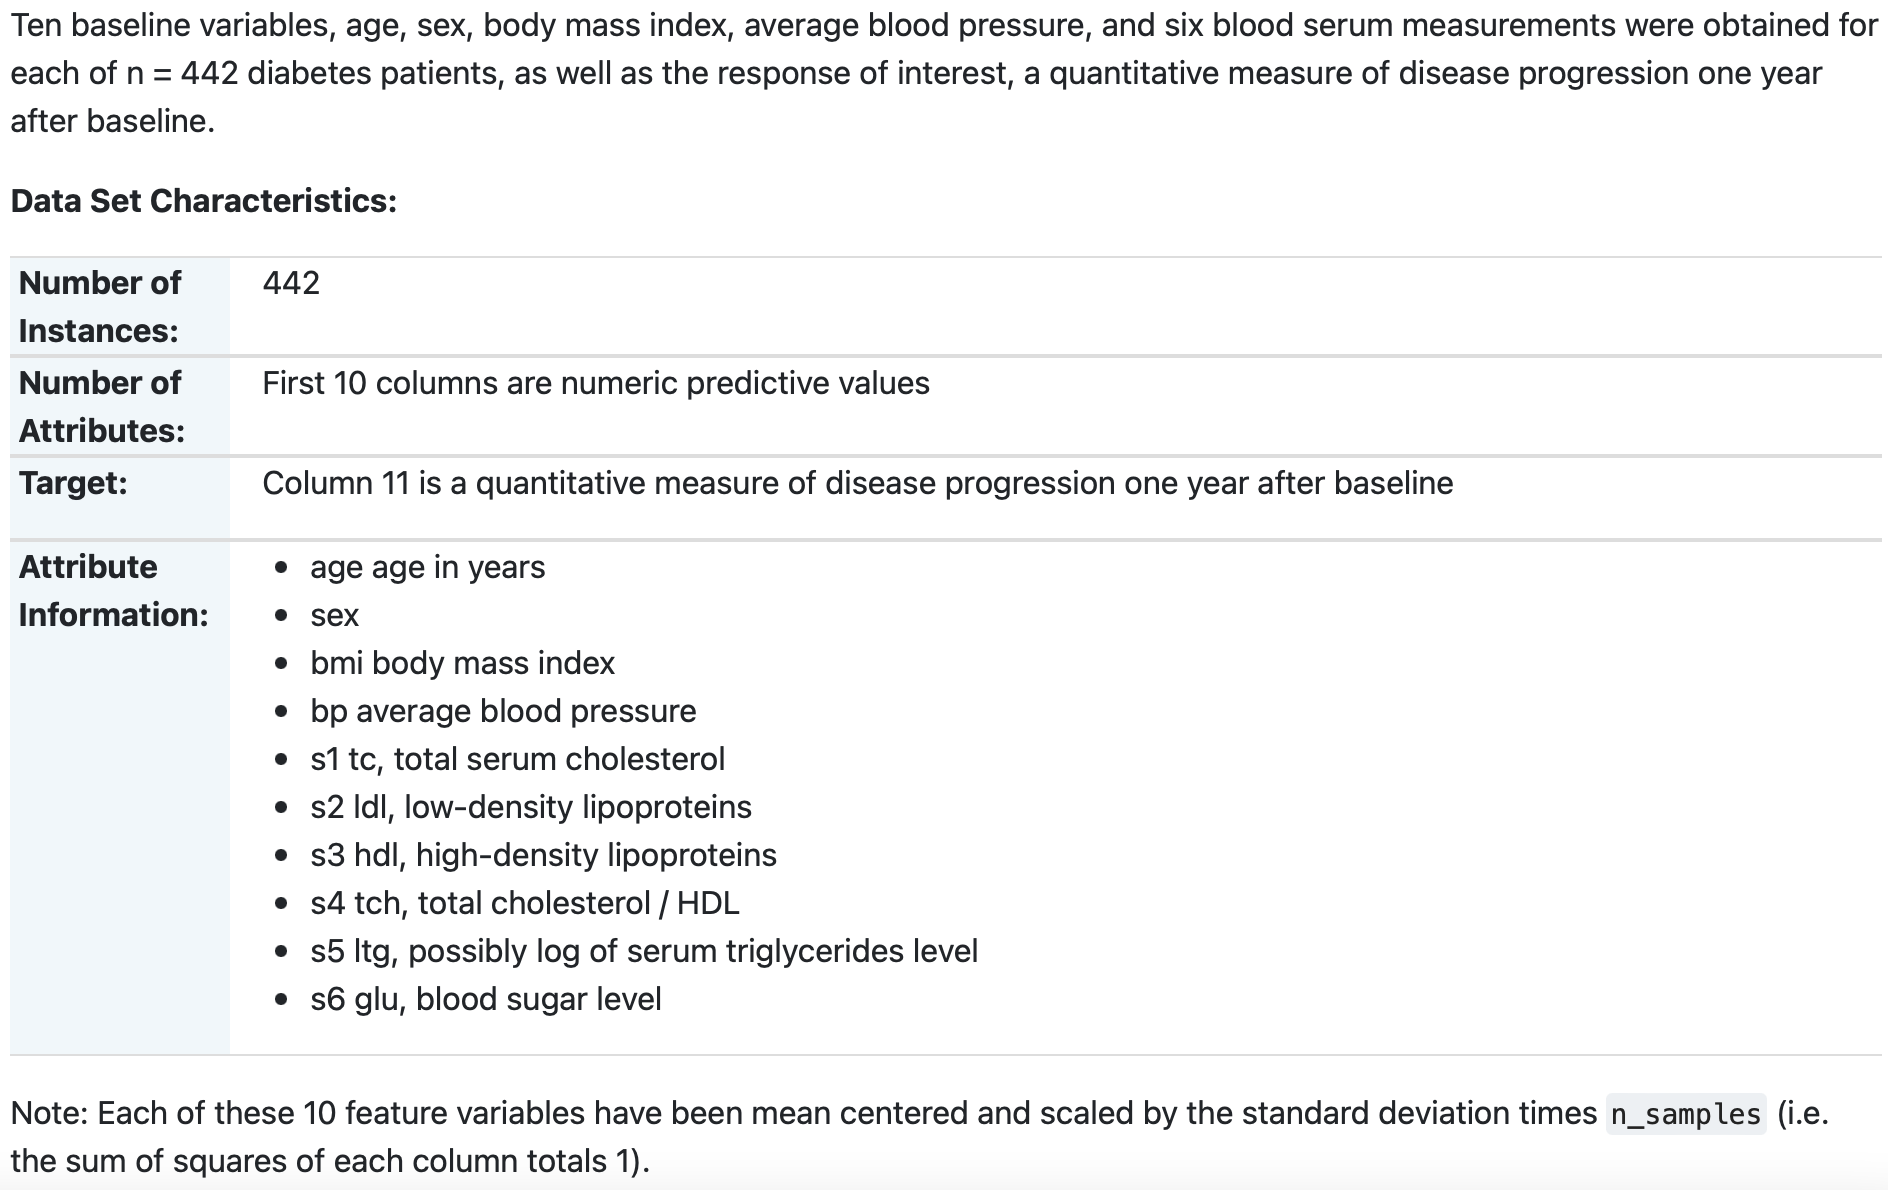

In [3]:
import matplotlib.pyplot as plt # Gráficas y visualizaciones
import numpy as np # Operaciones numéricas y algebra lineal tipo MATLAB
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score # MSE (función de costo) y R^2 (bondad de ajuste)
import matplotlib.pyplot as plt # Gráficas y visualizaciones (duplicado intencional en celda de Colab)
import numpy as np # Operaciones numéricas (duplicado intencional en celda de Colab)
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score # MSE y R^2 (duplicado intencional)

# Cargar el conjunto de datos de diabetes
#  - diabetes_X_all: matriz (n_muestras x 10) con 10 características estandarizadas
#  - diabetes_y: vector objetivo con la progresión de la enfermedad (medida cuantitativa)
diabetes_X_all, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Visualización del conjunto de datos
# Construimos una tabla con las primeras filas para entender el significado de cada columna
# (age, sex, bmi, bp, s1..s6) y la variable de salida (output)
# import numpy as np
from tabulate import tabulate
headers = ['age','sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'output']
complete_table = np.column_stack([diabetes_X_all, diabetes_y])
table = tabulate(complete_table[0:9,:], headers, tablefmt="fancy_grid")
print ("Visualizando las primeras 10 filas")
print(table)

import pandas as pd
df = pd.DataFrame(complete_table) # solo para visualizar en formato tabular
df.columns = headers
df
# import numpy as np (repetido para mantener la celda original)
from tabulate import tabulate
headers = ['age','sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'output']
complete_table = np.column_stack([diabetes_X_all, diabetes_y])
table = tabulate(complete_table[0:9,:], headers, tablefmt="fancy_grid")
print ("Visualizando las primeras 10 filas")
print(table)

import pandas as pd
df = pd.DataFrame(complete_table) # solo para visualizar en formato tabular
df.columns = headers
df


Visualizando las primeras 10 filas
╒═════════════╤════════════╤═════════════╤═════════════╤═════════════╤═════════════╤══════════════╤═════════════╤═════════════╤═════════════╤══════════╕
│         age │        sex │         bmi │          bp │          s1 │          s2 │           s3 │          s4 │          s5 │          s6 │   output │
╞═════════════╪════════════╪═════════════╪═════════════╪═════════════╪═════════════╪══════════════╪═════════════╪═════════════╪═════════════╪══════════╡
│  0.0380759  │  0.0506801 │  0.0616962  │  0.0218724  │ -0.0442235  │ -0.0348208  │ -0.0434008   │ -0.00259226 │  0.0199075  │ -0.0176461  │      151 │
├─────────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────────┼──────────────┼─────────────┼─────────────┼─────────────┼──────────┤
│ -0.00188202 │ -0.0446416 │ -0.0514741  │ -0.0263275  │ -0.00844872 │ -0.0191633  │  0.0744116   │ -0.0394934  │ -0.0683315  │ -0.092204   │       75 │
├─────────────┼────────────┼─────────────┼─────

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,output
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


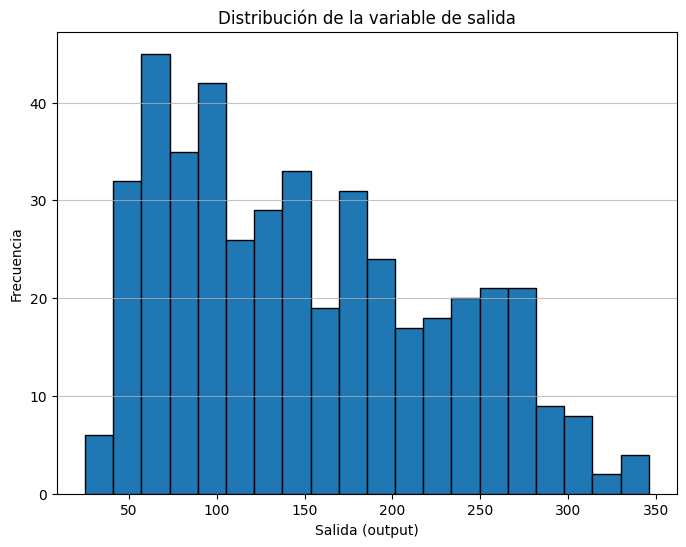

In [4]:
plt.figure(figsize=(8, 6))
plt.hist(df['output'], bins=20, edgecolor='black')
plt.title('Distribución de la variable de salida')
plt.xlabel('Salida (output)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

<Axes: xlabel='bmi', ylabel='output'>

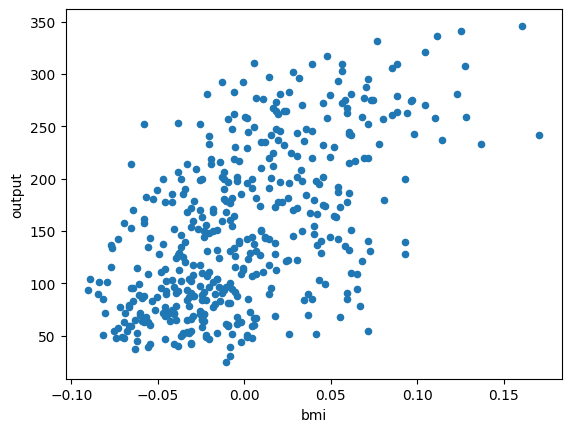

In [7]:
# Exploración rápida: relación entre índice de masa corporal (bmi) y la salida (output)
# Esto ayuda a visualizar si existe una tendencia lineal entre ambas variables.

df.plot.scatter(x='bmi', y='output')


Coeficientes: 
 theta_1 =  [44.64921599]  theta_0  =  153.36255924170615
Error cuadrático medio (MSE): 2548.07
Coeficiente de determinación (R^2): 0.47


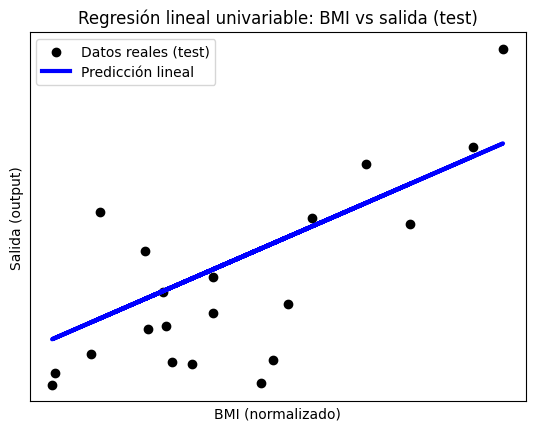

In [8]:
# Usaremos solo una característica (feature 2 = bmi) para un primer modelo univariable
diabetes_X = np.reshape(diabetes_X_all[:, 2], (-1, 1)) # convertir a vector columna (n_muestras x 1)

# División en conjuntos de entrenamiento y prueba
# Usamos todas menos las últimas 20 muestras para entrenar, y las últimas 20 para evaluar
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:] # últimas 20 para test

# División de las etiquetas (y) en entrenamiento y prueba de forma consistente
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Crear el modelo de regresión lineal (mínimos cuadrados ordinarios)
regr = linear_model.LinearRegression()

# Escalado de característica: media 0 y desviación estándar 1 (feature scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # z-score
scaler.fit(diabetes_X_train) # ¡Ajustar (fit) SOLO con datos de entrenamiento para evitar fuga de información!
diabetes_X_train_normalized = scaler.transform(diabetes_X_train) # normalizar conjunto de entrenamiento

# Entrenar el modelo usando el conjunto de entrenamiento ya escalado
# Proceso conceptual: 1) formular hipótesis lineal, 2) evaluar error (MSE), 3) optimizar (solución cerrada OLS)
regr.fit(diabetes_X_train_normalized, diabetes_y_train)

# Realizar predicciones sobre el conjunto de prueba
# ¡No volver a hacer fit con los datos de prueba! Eso causaría data leakage (fuga de información)
diabetes_X_test_normalized = scaler.transform(diabetes_X_test) # normalizar test usando el mismo scaler ajustado con training
diabetes_y_pred = regr.predict(diabetes_X_test_normalized)

# Parámetros del modelo: theta_0 (intercepto) y theta_1 (pendiente para bmi)
print("Coeficientes: \n", "theta_1 = ", regr.coef_, " theta_0  = ", regr.intercept_)
# Error cuadrático medio (MSE)
print("Error cuadrático medio (MSE): %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Coeficiente de determinación R^2: 1 indica predicción perfecta (compara varianza explicada vs total)
print("Coeficiente de determinación (R^2): %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Visualización de resultados en el conjunto de prueba
plt.scatter(diabetes_X_test_normalized, diabetes_y_test, color="black", label="Datos reales (test)")
plt.plot(diabetes_X_test_normalized, diabetes_y_pred, color="blue", linewidth=3, label="Predicción lineal")
plt.xlabel('BMI (normalizado)')
plt.ylabel('Salida (output)')
plt.title('Regresión lineal univariable: BMI vs salida (test)')
plt.legend()
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# código

Aquí las observaciones solicitadas



#**✅ Actividad 2: Uso de SGDRegressor con Mini-batch Gradient Descent**

Repite la Actividad 1 utilizando la función `partial_fit` del modelo [`SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor.partial_fit) de Scikit-learn. Implementa el entrenamiento mediante mini-batch Gradient Descent con el método `.partial_fit`. Recuerda que el `scaler` también necesita ser ajustado utilizando `partial_fit`.

**Objetivos:**

1. Entrenar el modelo **sin regularización** con dos valores distintos de la tasa de aprendizaje (learning rate):
   - Caso 1: Learning rate = 0.001
   - Caso 2: Learning rate = 0.1

2. Grafica la función de pérdida (Loss) en función de las iteraciones (Iterations or steps) para ambos casos.

3. Comenta tus observaciones sobre los resultados obtenidos.

**Tip:** Puedes consultar este [enlace](https://stackoverflow.com/questions/63660682/batch-size-and-number-of-epochs-in-partial-fit-in-sklearn-sgdregressor) para más información sobre cómo ajustar el tamaño de batch y el número de épocas en `partial_fit`.


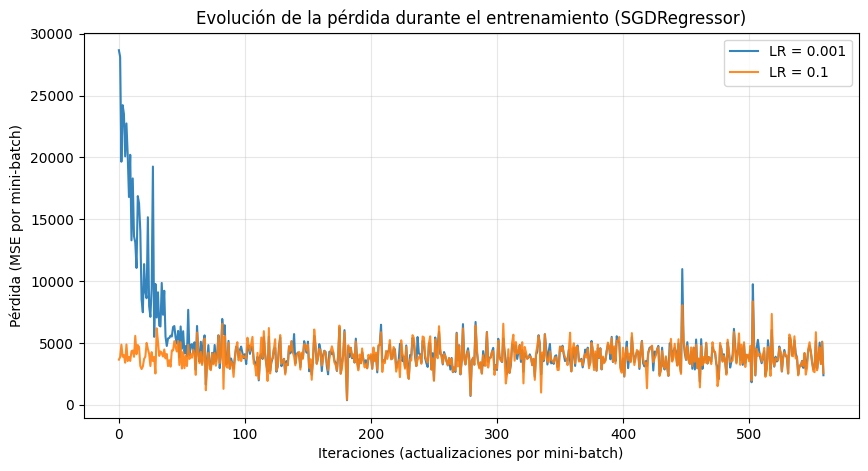

--- Resultados en TEST ---
LR=0.001 -> MSE: 2548.84 | R^2: 0.472
LR=0.1   -> MSE: 2387.96 | R^2: 0.506


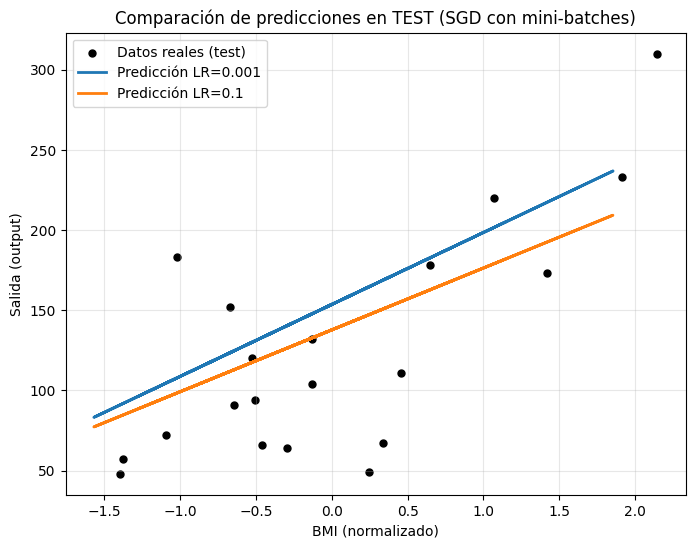

In [10]:
# Implementación de Mini-batch Gradient Descent con SGDRegressor y partial_fit
# - Dos tasas de aprendizaje (eta0): 0.001 y 0.1
# - Sin regularización (penalty=None, alpha=0.0)
# - Registro de la pérdida (MSE por mini-batch) a lo largo de las iteraciones

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Aseguramos que las variables de la Actividad 1 están disponibles:
# diabetes_X_train, diabetes_y_train, diabetes_X_test, diabetes_y_test

def iter_minibatches(X, y, batch_size, rng):
    n = X.shape[0]
    indices = rng.permutation(n)
    for start in range(0, n, batch_size):
        end = min(start + batch_size, n)
        batch_idx = indices[start:end]
        yield X[batch_idx], y[batch_idx]

def train_sgd_minibatch(X_train, y_train, X_test, y_test,
                        eta0=0.001, batch_size=32, n_epochs=30, random_state=42):
    rng = np.random.RandomState(random_state)

    # 1) Ajuste incremental del escalador solo con TRAIN (evitar fuga de información)
    scaler = StandardScaler()
    # Una pasada para estimar media y varianza con partial_fit sobre mini-batches
    for Xb, _ in iter_minibatches(X_train, y_train, batch_size, rng):
        scaler.partial_fit(Xb)

    # 2) Configurar el modelo SGD sin regularización
    sgd = SGDRegressor(
        loss='squared_error',
        penalty=None,      # sin regularización
        alpha=0.0,
        learning_rate='constant',
        eta0=eta0,
        fit_intercept=True,
        max_iter=1,        # haremos el bucle de épocas manualmente
        tol=None,
        random_state=random_state,
        warm_start=True
    )

    losses = []  # MSE por actualización (mini-batch)

    # 3) Entrenamiento por épocas con mini-batches
    for epoch in range(n_epochs):
        for Xb, yb in iter_minibatches(X_train, y_train, batch_size, rng):
            Xb_scaled = scaler.transform(Xb)
            # partial_fit actualiza el modelo con este mini-batch
            sgd.partial_fit(Xb_scaled, yb)
            # Registramos la pérdida (MSE) en el batch actual
            yb_pred = sgd.predict(Xb_scaled)
            batch_mse = np.mean((yb - yb_pred) ** 2)
            losses.append(batch_mse)

    # 4) Evaluación en TEST
    X_test_scaled = scaler.transform(X_test)
    y_test_pred = sgd.predict(X_test_scaled)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    return {
        'model': sgd,
        'scaler': scaler,
        'losses': losses,
        'y_test_pred': y_test_pred,
        'mse_test': mse_test,
        'r2_test': r2_test
    }

# Parámetros de entrenamiento
batch_size = 32
n_epochs = 40

# Caso 1: eta0 = 0.001 (learning rate pequeño)
res_lr_small = train_sgd_minibatch(
    diabetes_X_train, diabetes_y_train,
    diabetes_X_test, diabetes_y_test,
    eta0=0.001, batch_size=batch_size, n_epochs=n_epochs, random_state=42
)

# Caso 2: eta0 = 0.1 (learning rate grande)
res_lr_big = train_sgd_minibatch(
    diabetes_X_train, diabetes_y_train,
    diabetes_X_test, diabetes_y_test,
    eta0=0.1, batch_size=batch_size, n_epochs=n_epochs, random_state=42
)

# Gráfica de la función de pérdida por iteración (mini-batch update)
plt.figure(figsize=(10, 5))
plt.plot(res_lr_small['losses'], label='LR = 0.001', alpha=0.9)
plt.plot(res_lr_big['losses'], label='LR = 0.1', alpha=0.9)
plt.xlabel('Iteraciones (actualizaciones por mini-batch)')
plt.ylabel('Pérdida (MSE por mini-batch)')
plt.title('Evolución de la pérdida durante el entrenamiento (SGDRegressor)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Métricas en el conjunto de prueba
print('--- Resultados en TEST ---')
print(f"LR=0.001 -> MSE: {res_lr_small['mse_test']:.2f} | R^2: {res_lr_small['r2_test']:.3f}")
print(f"LR=0.1   -> MSE: {res_lr_big['mse_test']:.2f} | R^2: {res_lr_big['r2_test']:.3f}")

# Visualización comparativa en TEST (opcional): rectas aprendidas vs datos de test
plt.figure(figsize=(8, 6))
plt.scatter(StandardScaler().fit_transform(diabetes_X_test), diabetes_y_test, color='black', s=25, label='Datos reales (test)')

# Usamos los scalers específicos de cada entrenamiento para proyectar la misma escala de test
X_test_scaled_small = res_lr_small['scaler'].transform(diabetes_X_test)
X_test_scaled_big = res_lr_big['scaler'].transform(diabetes_X_test)

plt.plot(X_test_scaled_small, res_lr_small['y_test_pred'], color='tab:blue', linewidth=2, label='Predicción LR=0.001')
plt.plot(X_test_scaled_big, res_lr_big['y_test_pred'], color='tab:orange', linewidth=2, label='Predicción LR=0.1')
plt.xlabel('BMI (normalizado)')
plt.ylabel('Salida (output)')
plt.title('Comparación de predicciones en TEST (SGD con mini-batches)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Comentarios

- Con un LR de 0.001 el loss desciende de una manera más estable.
- Con un LR de 0.1 la curva del loss es más variable entre mini batches.
- Ambos casos tienen un rendimiento similar en el conjunto de prueba.